In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Text(0.5, 1.0, 'Rainfall')

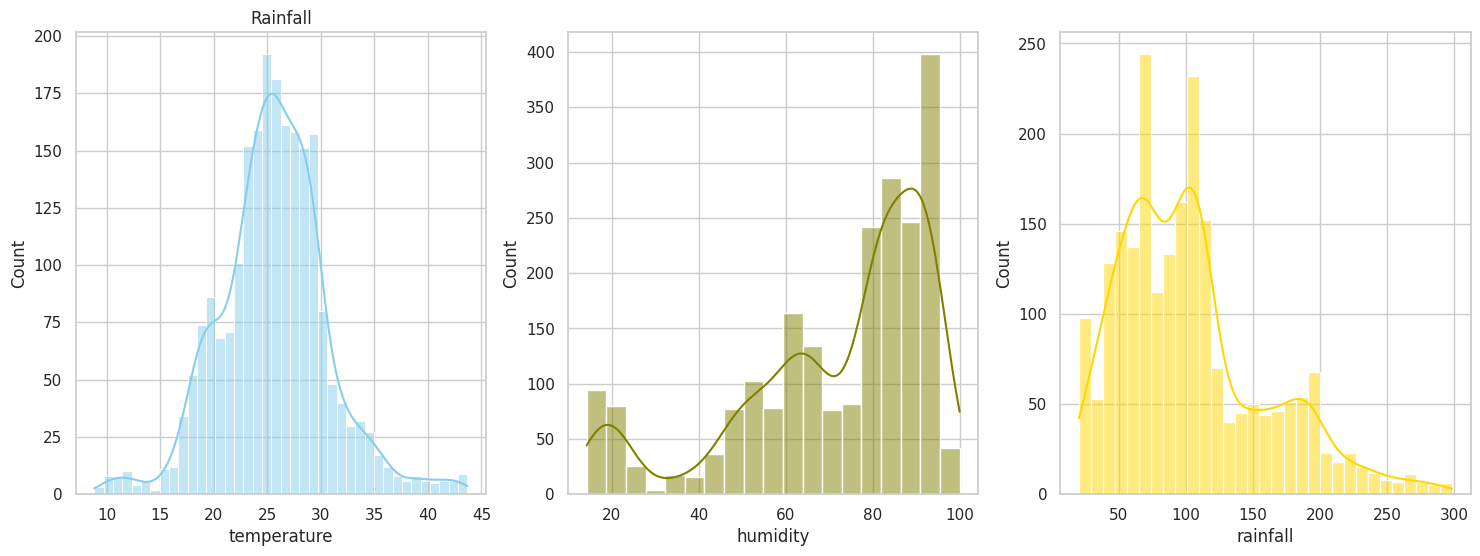

In [19]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(df['temperature'], kde = True, color=  "skyblue", ax = axes[0])
axes[0].set_title("Temperature")
sns.histplot(df['humidity'], kde = True, color=  "olive", ax = axes[1])
axes[0].set_title("Humidity")
sns.histplot(df['rainfall'], kde = True, color=  "gold", ax = axes[2])
axes[0].set_title("Rainfall")

In [20]:
crop_types = df.label.unique()

In [23]:
humidity_lists = [df[df.label == crop]['humidity'] for crop in crop_types]

In [24]:
from scipy.stats import f_oneway
anova_result_humidity = f_oneway(*humidity_lists)
anova_result_humidity

F_onewayResult(statistic=np.float64(3103.708891217502), pvalue=np.float64(0.0))

In [25]:
rainfall_lists = [df[df['label'] == crop]['rainfall'] for crop in crop_types]
anova_result_rainfall = f_oneway(*rainfall_lists)
anova_result_rainfall

F_onewayResult(statistic=np.float64(605.5279661441423), pvalue=np.float64(0.0))

In [26]:
temperature_lists = [df[df['label'] == crop]['temperature'] for crop in crop_types]
anova_result_temperature = f_oneway(*temperature_lists)
anova_result_temperature

F_onewayResult(statistic=np.float64(102.18698122995393), pvalue=np.float64(4.019323818173197e-305))

In [27]:
num_columns = df.select_dtypes(include =['float64','int64'])
corr_matrix = num_columns.corr()
corr_matrix

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

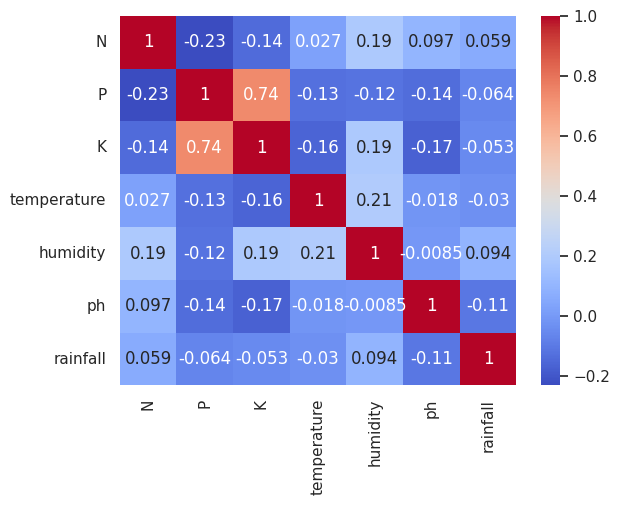

In [28]:
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')